In [1]:
import os
import cv2

from CropManager import Crop
from utils.data import sample_distribution, split_dataset
from Data import TFRecordBuilder, DataBuilder
from Visualizer.Grid import display_grid_from_path

2025-07-30 19:59:16.375928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753919956.388574   71810 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753919956.392400   71810 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753919956.402301   71810 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753919956.402317   71810 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753919956.402318   71810 computation_placer.cc:177] computation placer alr

In [2]:
data_dir = "../../CBIS_DDSM_Dataset/"
crop_dir = "../../CBIS"
tf_records_path = "../../TFRecords"
crop_output=128
percentage = (15, 15, 3, 3)
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))

cropper = Crop(data_dir, crop_dir, filter=clahe)

In [3]:
cropper.generate_crops(crop_output=crop_output, percentage=percentage)

True

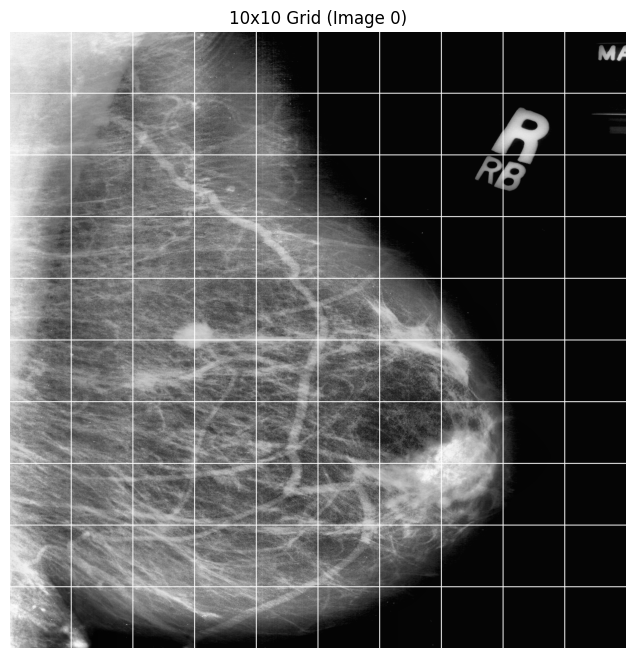

[array([[241, 242, 242, ..., 225, 224, 222],
        [241, 244, 242, ..., 235, 231, 221],
        [243, 239, 241, ..., 236, 238, 234],
        ...,
        [218, 210, 209, ..., 167, 170, 180],
        [218, 210, 211, ..., 170, 169, 176],
        [218, 214, 210, ..., 169, 177, 173]], dtype=uint8),
 array([[226, 223, 220, ..., 235, 241, 244],
        [228, 225, 222, ..., 232, 234, 237],
        [225, 222, 221, ..., 230, 231, 232],
        ...,
        [177, 182, 188, ...,  96, 106, 114],
        [178, 185, 192, ..., 102, 104, 107],
        [182, 195, 190, ..., 103,  98, 110]], dtype=uint8),
 array([[233, 234, 231, ..., 135, 137, 147],
        [234, 230, 230, ..., 144, 137, 156],
        [226, 226, 222, ..., 148, 137, 146],
        ...,
        [100,  94,  99, ..., 154, 144, 143],
        [ 97,  92, 103, ..., 134, 129, 136],
        [111, 123, 111, ..., 136, 140, 138]], dtype=uint8),
 array([[151, 152, 142, ...,   5,  10,   3],
        [152, 136, 139, ...,   5,   3,   5],
        [147, 13

In [8]:
display_grid_from_path(crop_dir, 0, 10, mask=False, spacing=2)

In [9]:
data_builder = DataBuilder(crop_dir)
df = data_builder.build_dataframe()
df

,image_path,mask_path,mask_class
0,../../CBIS/image_147/image_147_grid_7_16.png,../../CBIS/image_147/image_147_grid_7_16_mask.png,positive
1,../../CBIS/image_147/image_147_grid_8_22.png,../../CBIS/image_147/image_147_grid_8_22_mask.png,negative
2,../../CBIS/image_147/image_147_grid_10_79.png,../../CBIS/image_147/image_147_grid_10_79_mask...,negative
3,../../CBIS/image_147/image_147_grid_10_85.png,../../CBIS/image_147/image_147_grid_10_85_mask...,negative
4,../../CBIS/image_147/image_147_grid_10_68.png,../../CBIS/image_147/image_147_grid_10_68_mask...,negative
...,...,...,...
113395,../../CBIS/image_66/image_66_grid_8_19.png,../../CBIS/image_66/image_66_grid_8_19_mask.png,negative
113396,../../CBIS/image_66/image_66_grid_7_48.png,../../CBIS/image_66/image_66_grid_7_48_mask.png,negative
113397,../../CBIS/image_66/image_66_grid_10_61.png,../../CBIS/image_66/image_66_grid_10_61_mask.png,negative
113398,../../CBIS/image_66/image_66_grid_6_21.png,../../CBIS/image_66/image_66_grid_6_21_mask.png,negative


In [10]:
proportions = {'positive': 1.0, 'negative': 0.0}
balanced_df = sample_distribution(df, class_column='mask_class', proportions=proportions, random_state=42)

In [11]:
balanced_df

,image_path,mask_path,mask_class
0,../../CBIS/image_14/image_14_grid_9_25.png,../../CBIS/image_14/image_14_grid_9_25_mask.png,positive
1,../../CBIS/image_276/image_276_grid_9_20.png,../../CBIS/image_276/image_276_grid_9_20_mask.png,positive
2,../../CBIS/image_129/image_129_grid_10_59.png,../../CBIS/image_129/image_129_grid_10_59_mask...,positive
3,../../CBIS/image_273/image_273_grid_5_16.png,../../CBIS/image_273/image_273_grid_5_16_mask.png,positive
4,../../CBIS/image_30/image_30_grid_10_53.png,../../CBIS/image_30/image_30_grid_10_53_mask.png,positive
...,...,...,...
7807,../../CBIS/image_127/image_127_grid_6_16.png,../../CBIS/image_127/image_127_grid_6_16_mask.png,positive
7808,../../CBIS/image_283/image_283_grid_9_49.png,../../CBIS/image_283/image_283_grid_9_49_mask.png,positive
7809,../../CBIS/image_16/image_16_grid_4_7.png,../../CBIS/image_16/image_16_grid_4_7_mask.png,positive
7810,../../CBIS/image_62/image_62_grid_8_43.png,../../CBIS/image_62/image_62_grid_8_43_mask.png,positive


In [12]:
train_df, test_df = split_dataset(balanced_df)

Split Summary:
Train: 6249
Test: 1563


In [13]:
os.makedirs(tf_records_path, exist_ok=True)
train_tfrecords = TFRecordBuilder(train_df, tf_records_path)
train_tfrecords.write_tfrecord("Train")

test_tfrecords = TFRecordBuilder(test_df, tf_records_path)
test_tfrecords.write_tfrecord("Test")

Writing Train: 100%|██████████| 6249/6249 [00:11<00:00, 566.35it/s]


✅ Saved Train to ../../TFRecords/train.tfrecord


Writing Test: 100%|██████████| 1563/1563 [00:02<00:00, 567.25it/s]

✅ Saved Test to ../../TFRecords/test.tfrecord


In [24]:
import shutil
shutil.make_archive('../../cbis_tfrecords', 'zip', '../../TFRecords')

'/home/nifdi-guliyev/Documents/GitHub/Cancer-Segmentation/cbis_tfrecords.zip'